Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


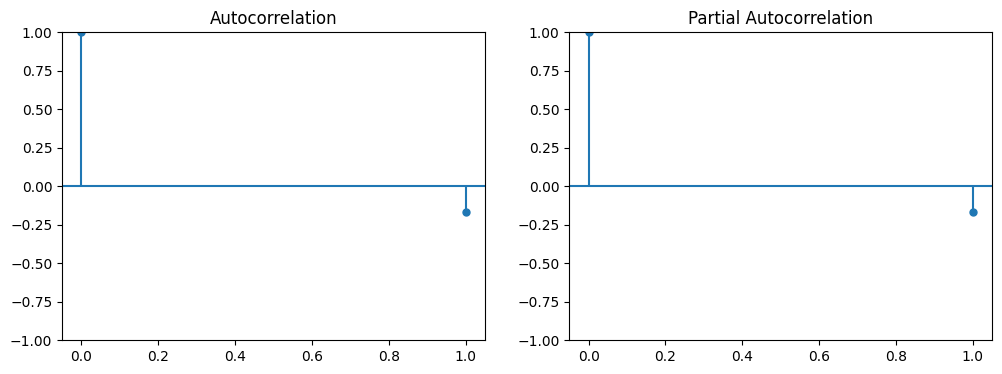

Predictions for test data:
2022-01-01    39087.553217
2023-01-01    36640.859470
Freq: AS-JAN, Name: predicted_mean, dtype: float64


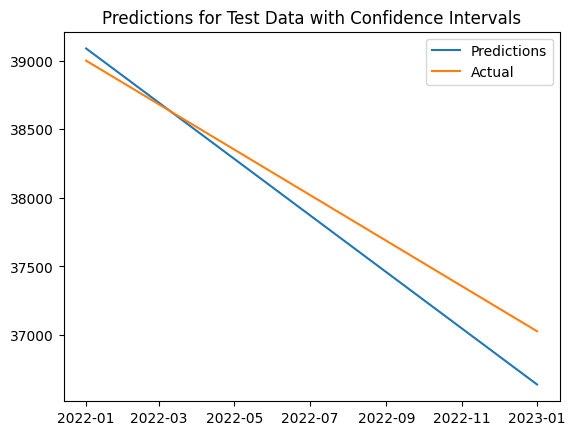

Mean squared error:  79084.73135190619
R-squared:  0.9185050246283066

Predictions for 2024-2028:
2024-01-01    38777.674294
2025-01-01    36911.491574
2026-01-01    38541.318316
2027-01-01    37117.912568
2028-01-01    38361.040976
Freq: AS-JAN, Name: predicted_mean, dtype: float64


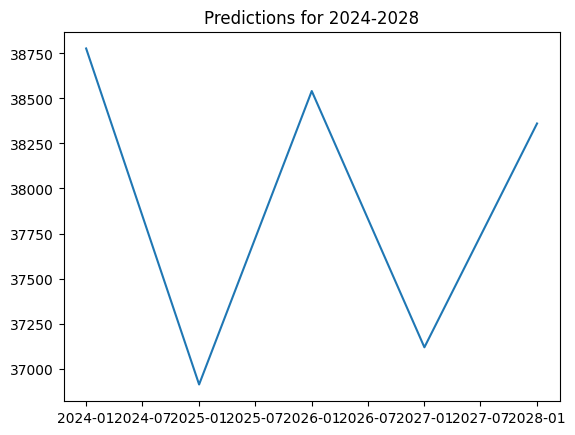

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def build_arima_model():
    # Load the data
    df = pd.read_csv('/content/drive/MyDrive/AREA DATA TABLE v2.1.csv')

    # Set the 'YEAR' column as the index
    df.set_index('YEAR', inplace=True)

    # Convert the index to a datetime format
    df.index = pd.to_datetime(df.index, format='%Y')

    # Split the data into training and testing sets
    train = df[:-2] # Train on all data except the last 2 years
    test = df[-2:]  # Test on the last 2 years

    # Build and fit the ARIMA model
    model = ARIMA(train, order=(1,1,2))
    model_fit = model.fit()

    # Make predictions for the last 2 years of the data
    predictions = model_fit.predict(start=test.index[0], end=test.index[-1])

    # Make predictions for 2024, 2025, 2026, 2027 and 2028
    ftpredictions = model_fit.predict(start='2024', end='2028')

    # --- Model Diagnostics ---
    residuals = model_fit.resid

    # Plot ACF and PACF of residuals
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(residuals, ax=axes[0])
    plot_pacf(residuals, ax=axes[1])
    plt.show()

    # --- Confidence Intervals ---
    # Get confidence intervals for predictions
    conf_int = model_fit.get_prediction(start=test.index[0], end=test.index[-1]).conf_int

    return predictions, test, ftpredictions, conf_int

# Execute the function and get both predictions, test data and confidence intervals
predictions, test, ftpredictions, conf_int = build_arima_model()
print("Predictions for test data:")
print(predictions)

# Plot the predictions for test data with confidence intervals
plt.plot(predictions, label='Predictions')
plt.plot(test['EROSION AREA/m2'], label='Actual')

# Check if conf_int is a function before accessing its attributes
if not callable(conf_int):
  plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2, color='blue', label='Confidence Interval')

plt.title("Predictions for Test Data with Confidence Intervals")
plt.legend()
plt.show()

# Evaluate the accuracy of the predictions on test data
mse = mean_squared_error(test, predictions)
r2 = r2_score(test, predictions)
print('Mean squared error: ', mse)
print('R-squared: ', r2)

# Print and plot future predictions
print("\nPredictions for 2024-2028:")
print(ftpredictions)

plt.plot(ftpredictions)
plt.title("Predictions for 2024-2028")
plt.show()